# Computational Programming with Python
### Lecture 8: Exceptions and Introduction to OOP


### Center for Mathematical Sciences, Lund University
Lecturer: Claus Führer, Malin Christersson, Robert Klöfkorn


## This lecture

- Numpy array operations vs. for loops
- Catching exceptions
- Throwing exceptions
- Introduction to object oriented programming (OOP)
- Example - Making a class for rational numbers

# Numpy array operations vs. for loops

Last lecture, changing the red pixels using slices:

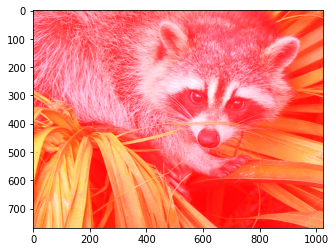

In [1]:
from numpy import *
from matplotlib.pyplot import *
import scipy.misc
%matplotlib inline

M = scipy.misc.face().copy()  # must make a copy to change it
M[:, :, 0] = 255  # maximize red for each pixel

imshow(M) 

## Maximize red using for loops

Instead of using slices we could use for loops:

The red-color-assignment is made 786432 times.


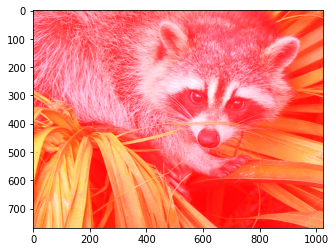

In [2]:
M = scipy.misc.face().copy()

rows, columns, channels = M.shape

for row in range(rows):
    for col in range(columns):
        M[row, col, 0] = 255
        
print(f"The red-color-assignment is made {rows*columns} times.")

imshow(M)

## The `time` module

Using the module `time`, we can get the number of seconds since the **epoch**.

In [3]:
import time

print(f"The epoch is: {time.gmtime(0)}")

print(f"It has been {time.time()} seconds since the epoch.")

The epoch is: time.struct_time(tm_year=1970, tm_mon=1, tm_mday=1, tm_hour=0, tm_min=0, tm_sec=0, tm_wday=3, tm_yday=1, tm_isdst=0)
It has been 1606314154.113752 seconds since the epoch.


## Measuring time

In [4]:
M = scipy.misc.face().copy()

starttime = time.time() # store time at start point   
M[:, :, 0] = 255
print(f"Using slices took {time.time()-starttime} seconds.")

rows, columns, channels = M.shape

starttime = time.time()
for row in range(rows):
    for col in range(columns):
        M[row, col, 0] =255
print(f"Using for loops took {time.time()-starttime} seconds.")

Using slices took 0.0005185604095458984 seconds.
Using for loops took 0.19710326194763184 seconds.


We will later use the `timeit` module to measure time.

Program in the `pythonic` way, i.e. write code as simple as possible (some about that later). 


# Catching exceptions

When using data that a user provides, or reading data from files, execution errors (so called **exceptions**) can occur. 

Many programming languages have some kind of **exception handling**.

We will read data from files later, here is an example of using user data:

In [1]:
name = input("Enter your name:")
print(f"Hello {name}!")

Enter your name:Justin Time
Hello Justin Time!


## Example &hyphen; Reciprocal

What could go wrong?

In [2]:
answer = input("Enter a non-zero float:")
nr = float(answer)
print(f"1/{nr} = {1/nr}")

Enter a non-zero float:ABC


ValueError: could not convert string to float: 'ABC'

## Reciprocal &hyphen; catching the errors

First catch possible `ValueError`. If no `ValueError`, catch `ZeroDivisionError`:

In [23]:
answer = input("Enter a non-zero float:")
try:
    nr = float(answer)
    print(f"1/{nr} = {1/nr}")
except ValueError:
    print("That wasn't a FLOAT!")
except ZeroDivisionError:          
    print("That wasn't NON ZERO!")

Enter a non-zero float:0
That wasn't NON ZERO!


## Reciprocal - keep trying

An example using `try-except-else`:

In [3]:
while True:
    try:
        answer = input("Enter a non-zero float:")
        nr = float(answer)
        result = 1/nr          # we could also break here
    except ValueError:
        print("That wasn't a FLOAT!")
    except ZeroDivisionError:
        print("That wasn't NON ZERO!")
    else:
        break  # no exceptions were raised
        
print(f"1/{nr} = {1/nr}")

Enter a non-zero float:ABC
That wasn't a FLOAT!
Enter a non-zero float:0
That wasn't NON ZERO!
Enter a non-zero float:17
1/17.0 = 0.058823529411764705


## Exceptions are propagated


In [4]:
def reciprocal(nr):
    return 1/nr        # ZeroDivisionError may be raised here

def get_input():
    nr = float(input("Enter a non-zero float:"))
    result = reciprocal(nr)  
    print(result)

try:
    get_input()
except Exception:    # Most exceptions are caught here  
    print("Something went wrong.")
    

Enter a non-zero float:0
Something went wrong.


### Flow control
An exception stops the flow and looks for the closest enclosing try block. If it is not caught it continues searching for the next try block.

## Catching multiple exceptions

We can catch most exceptions by using `Exception`:
    
```python
try:
    get_input()
except Exception:     
    print("Something went wrong.")
```

We can also specify multiple exceptions to be handled with the same code:

```python
try:
    get_input()
except (ValueError, ZeroDivisionError):     
    print("Wrong value or division by zero.")
except TypeError:
    print("Wrong type.")
```    

## Clean-up code using `finally`

Code after `finally` is always executed.

```python
try:
    get_input()
except ValueError:
    print("Wrong value.")
except ...: 
    ...:
else:
    print("No exceptions occurred.")
finally:
    print("Good bye!)  
```



# Raising exceptions

We can raise an exception (or throw an exception in other programming languages) by using the keyword `raise`.

#### Example  using `Exception`
```python
def handle_positive_int(n):
    if n > 0:
        # do something
    else:
        raise Exception(f"{n} isn't positive!")
``` 

#### Example using `TypeError`

```python
def handle_int(n):
    if isinstance(n, int):
        # do something
    else:
        raise TypeError(f"{n} isn't an integer!")
```

## Error messages

### Golden rule
Never print error message, raise an exception instead.

Don't do this:

In [31]:
def fixpoint_iter(f, x0, maxit = 100, tol = 1e-6):
    x = x0
    for i in range(maxit):
        fx = f(x)
        if abs(x - fx) < tol:
            break
        x = fx
    else:
        print(f"It didn't converge in {maxit} iterations.")
    return x, i # here x and i will not be meaningful 

fp, numit = fixpoint_iter(lambda x: 1/(1+x) , 1, maxit = 10) 
print(fp) # not the correct fixpoint within given tolerance

It didn't converge in 10 iterations.
0.6180555555555556


## Error messages (cont)

### Golden rule
Never print error message, raise an exception instead.

Do this:

In [5]:
def fixpoint_iter(f, x0, maxit = 100, tol = 1e-6):
    oldx = x0
    for i in range(maxit):
        x = f(oldx)
        if abs(x - oldx) < tol:
            break
        oldx = x
    else:
        raise Exception(f"It didn't converge in {maxit} iterations.")
    return x, i

fp, numit = fixpoint_iter(lambda x: 1/(1+x) , 1, maxit = 10) 
print(fp) # not the correct fixpoint within given tolerance

Exception: It didn't converge in 10 iterations.

## Error messages (cont)

With the last construction we can do things like this:

In [7]:
for it in [10, 100, 1000, 10000 ]:
    try:
        fp, numit = fixpoint_iter(lambda x: 1/(1+x) , 1, maxit = it) 
    except Exception:
        print(f"{it} iterations were not enough.")
    else:
        print(f"Converged to {fp} in {numit} iterations.")
        break

10 iterations were not enough.
Converged to 0.6180338134001252 in 14 iterations.


## The bisection method revisited

Finding a root of $f(x) = 0$ where $f(x) = 3x^2 -5$.

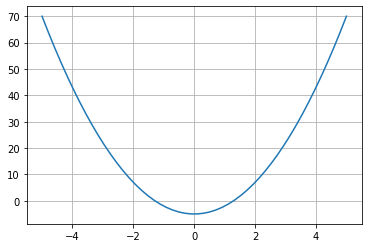

In [6]:
from numpy import *
from matplotlib.pyplot import *
%matplotlib inline

x = linspace(-5, 5, )
plot(x, (lambda x: 3*x**2-5)(x))  #an anonymous function as argument 
grid()

## An implementation of the bisection method

In [8]:
def bisect(f, a, b, tol = 1e-8):
    for i in range(100):
        mid = (a+b)/2
        if abs(b-a) < tol:
            return [a, b], mid
        if f(a)*f(mid) < 0:
            b = mid
        else:
            a = mid
        

i, m = bisect(lambda x: 3*x**2-5, -2, -3)
print(m)  # not a root

-2.9999999962747097


## Bisection that raises exceptions

In [9]:
def bisect(f, a, b, tol = 1e-8):
    if f(a)*f(b) >= 0:
        raise ValueError("Incorrect interval.")
    for i in range(100):
        mid = (a+b)/2
        if abs(b-a) < tol:
            return [a, b], mid
        if f(a)*f(mid) < 0:
            b = mid
        else:
            a = mid
    raise Exception("No root found.")

Iterating over a `try-except` block we could try to find an appropriate interval.

## The Zen of Python

Exercise: Read **The Zen of Python**!

In ipython write: 
```Python 
import this
```

# Introduction to object oriented programming (OOP)

Everything in Python is an object. We use objects all the time.

An object can have attributes that are **data attributes** or **method attributes**.

In [10]:
A = array([[1, 2, 3], [4, 5, 6]])
print(type(A))

init_shape = A.shape     # data
print(f"initial shape: {init_shape}")

A = A.reshape((2, 3))    # method called with argument
print(A)

A = A.flatten()          # method called without argument
print(A)

<class 'numpy.ndarray'>
initial shape: (2, 3)
[[1 2 3]
 [4 5 6]]
[1 2 3 4 5 6]


## Datatypes and classes

You can create your own datatype using the keyword `class`.

A minimalistic example:

In [11]:
class Nix:
    pass

a = Nix()

if isinstance(a, Nix):
    print("Indeed it belongs to the new class Nix.")

Indeed it belongs to the new class Nix.


The object `a` is an **instance** of `Nix`.

## Inheritance and class hierarchies

*Child classes* can *inherit* data and methods from *parent classes*.

Example: Hierarchy of **some** built-in exceptions classes:

![exceptions](http://cmc.education/slides/notebookImages/exceptions.svg)

## Naming conventions

See [PEP 8 &hyphen; Style Guide for Python Code](https://www.python.org/dev/peps/pep-0008/) for details.

Function and variable names should be lowercase, words separated by underscore.

```python
my_special_variable = 1

def my_special_function():
    ...
```

Or *CapitalizedWords* with initial lowercase character

```python
mySpecialVariable = 1

def mySpecialFunction():
    ...
```

Class names should use *CamelCase*.

```python
class MySpecialClass:
    ...
```

# Example - Making a class for rational numbers

When a class is instantiated, a function `__init__` is called. (Two double underscores in `__init__`.)

We can define what `__init__` should do:

In [36]:
class RationalNumber:
    def __init__(self, numerator, denominator):  # Three parameters!
        self.numerator = numerator
        self.denominator = denominator
        
p = RationalNumber(5, 2)                         # Two arguments!

print(type(p))
print(p.numerator)
print(p.denominator)

<class '__main__.RationalNumber'>
5
2


## `__init__` and `self`

What happens when

```python
p = RationalNumber(5, 2)
```

is executed?

- a new object with name `p` is created
- the command `p.__init__(5, 2)` is executed

`self` is a placeholder for the name of the newly created instance (here: `p`)

## Raising exceptions

In [37]:
class RationalNumber:
    def __init__(self, numerator, denominator):
        if not isinstance(numerator, int) or not isinstance(denominator, int):
            raise TypeError("numerator and denominator must be integers.")
        self.numerator = numerator
        self.denominator = denominator
        
q = RationalNumber(5, 2.0)  # Raises a TypeError

TypeError: numerator and denominator must be integers.

##  Adding methods

Methods are functions bound to an instance of the class:

In [38]:
class RationalNumber:
    def __init__(self, numerator, denominator):  # assuming correct type
        self.numerator = numerator
        self.denominator = denominator
    
    def convert2float(self):    # One parameter
        return self.numerator/self.denominator
    

p = RationalNumber(5, 2)        # Two arguments
p_float = p.convert2float()     # Zero arguments
print(p_float)

2.5


Note again the special role of `self`.

## Adding methods (cont)

Note:
Both commands are equivalent:

In [40]:
float1 = p.convert2float() 
float2 = RationalNumber.convert2float(p) # p is self here, the instance

# print(RationalNumber.convert2float)
# print(p.convert2float)

print(float1)
print(float2)

<function RationalNumber.convert2float at 0x7f4884801280>
<bound method RationalNumber.convert2float of <__main__.RationalNumber object at 0x7f48848eceb0>>
2.5
2.5


## Adding methods (cont)

In [12]:
class RationalNumber:
    def __init__(self, numerator, denominator): 
        self.numerator = numerator
        self.denominator = denominator
    
    def convert2float(self):
        return self.numerator/self.denominator
    
    def add(self, other):
        p1, q1 = self.numerator, self.denominator
        if isinstance(other, RationalNumber):
            p2, q2 = other.numerator, other.denominator
        elif isinstance(other, int):
            p2, q2 = other, 1
        else:
            raise TypeError("Wrong type!")
        return RationalNumber(p1*q2 + p2*q1, q1*q2)
    
p = RationalNumber(1, 2)
q = RationalNumber(1, 3)
p_plus_q = p.add(q)    # addition using dot notation 
print(f"{p_plus_q.numerator}/{p_plus_q.denominator}")

5/6


## Special methods: Operators

We would like to add RationalNumbers number instances just by `p+q` 

Renaming the method `RatinalNumber.add` to `RationalNumber.__add__`makes this possible.

### Using `__add__` 

In [42]:
class RationalNumber:
    def __init__(self, numerator, denominator): 
        self.numerator = numerator
        self.denominator = denominator
    
    def convert2float(self):
        return self.numerator/self.denominator
    
    def __add__(self, other):  # assuming other is a RationalNumber
        p1, q1 = self.numerator, self.denominator
        p2, q2 = other.numerator, other.denominator
        return RationalNumber(p1*q2 + p2*q1, q1*q2)
    
p = RationalNumber(1, 2)
q = RationalNumber(1, 3)
p_plus_q = p+q             # Here we add by using +
print(f"{p_plus_q.numerator}/{p_plus_q.denominator}")

5/6


## Special methods: Operators (cont)

Some special methods:

| Operator | Method | Operator | Method |
| :---: | :--- | :---: | :--- |
| + | `__add__` | == | `__eq__` |
| - | `__sub__` | != | `__ne__` |
| * | `__mul__` | < | `__lt__` |
| / | `__truediv__` | <= | `__le__` |
| ** | `__pow__` | > | `__gt__`|
| | | >= | `__ge__` |


## Special methods: Representation

Instead of using:

```python
p = RationalNumber(5, 2)
print(f"{p.numerator}/{p.denominator}")
```

we should be able to just use:

```python
print(p)
``` 

## Special methods: Representation (cont)

`__repr__` defines how the object is represented, when just typing its name.

In [43]:
class RationalNumber:
    def __init__(self, numerator, denominator): 
        self.numerator = numerator
        self.denominator = denominator
    
    def __add__(self, other):  # assuming other is a RationalNumber
        p1, q1 = self.numerator, self.denominator
        p2, q2 = other.numerator, other.denominator
        return RationalNumber(p1*q2 + p2*q1, q1*q2)
    
    def __repr__(self):
        return f"{self.numerator}/{self.denominator}"
    
p = RationalNumber(5, 2)
print(p)

5/2


## Reverse operations

Using

In [44]:
class RationalNumber:
    def __init__(self, numerator, denominator): 
        self.numerator = numerator
        self.denominator = denominator
        
    def add(self, other):
        p1, q1 = self.numerator, self.denominator
        if isinstance(other, RationalNumber):
            p2, q2 = other.numerator, other.denominator
        elif isinstance(other, int):
            p2, q2 = other, 1
        else:
            raise TypeError('Wrong type!')
        return RationalNumber(p1*q2 + p2*q1, q1*q2)

we can do the operations 1/5 + 5/6 or 1/5 + 2, but 2 + 1/5 requires that the integer's method `__add__` knows about `RationalNumber`.

Instead of extending the methods of `int` we use the reverse operation `__radd__`.

## Reverse operations (cont)

In [45]:
class RationalNumber:
    def __init__(self, numerator, denominator): 
        self.numerator = numerator
        self.denominator = denominator
    
    def __add__(self, other):
        p1, q1 = self.numerator, self.denominator
        if isinstance(other, RationalNumber):
            p2, q2 = other.numerator, other.denominator
        elif isinstance(other, int):
            p2, q2 = other, 1
        else:
            raise TypeError("Wrong type!")
        return RationalNumber(p1*q2 + p2*q1, q1*q2)
    
    def __radd__(self, other):
        return self + other
    
    def __repr__(self):
        return f"{self.numerator}/{self.denominator}"
    
p = RationalNumber(2, 5)
q = 2
print(p + q)  # p.__add__(q) is called
print(q + p)  # q.__add__(p) is first attempted, then p.__radd__(q) is called

12/5
12/5
